In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.dataset import dataset_experiments, compute_spectrum, compute_cospectrum
%load_ext autoreload
%autoreload 2

In [2]:
common_folder = '/scratch/pp2681/mom6'

# FGR study

In [4]:
exps = ('Feb2022/bare/R4', 'Feb2022/bare/R8', 'Feb2022/bare/R32', 'Feb2022/bare/R64',
        'Mar2022/R4/FGR/FGR1',  'Mar2022/R4/FGR/FGR2',  'Mar2022/R4/FGR/FGR22',  'Mar2022/R4/FGR/FGR24',  'Mar2022/R4/FGR/FGR26',  'Mar2022/R4/FGR/FGR28',  'Mar2022/R4/FGR/FGR3',
        'Mar2022/R8/FGR/FGR1',  'Mar2022/R8/FGR/FGR2',  'Mar2022/R8/FGR/FGR22',  'Mar2022/R8/FGR/FGR24',  'Mar2022/R8/FGR/FGR26',  'Mar2022/R8/FGR/FGR28',  'Mar2022/R8/FGR/FGR3',
        'Mar2022/R4/Visc/Cs006', 'Mar2022/R4/Visc/Cs004', 'Mar2022/R4/Visc/Cs002', 'Mar2022/R4/Visc/Cs001', 
        'Mar2022/R4/Filter/iter1_order1',  'Mar2022/R4/Filter/iter1_order3', 'Mar2022/R4/Filter/iter2_order1', 'Mar2022/R4/Filter/iter8_order1', 'Mar2022/R4/Filter/iter8_order3',
        'Mar2022/R4/Filter/iter1_order2',  'Mar2022/R4/Filter/iter1_order4', 'Mar2022/R4/Filter/iter4_order1',  'Mar2022/R4/Filter/iter8_order2'
       )

In [5]:
ds = dataset_experiments(common_folder, exps)

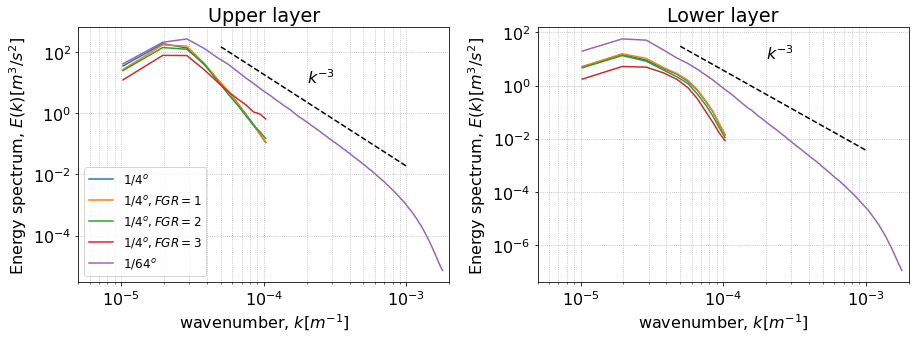

In [138]:
ds.plot_KE_spectrum(('Feb2022/bare/R4', 'Mar2022/R4/FGR/FGR1', 'Mar2022/R4/FGR/FGR2', 'Mar2022/R4/FGR/FGR3', 'Feb2022/bare/R64'),
                    names = ('$1/4^o$', '$1/4^o, FGR=1$', '$1/4^o, FGR=2$', '$1/4^o, FGR=3$', '$1/64^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
plt.savefig('R4_spec.png', dpi=150)

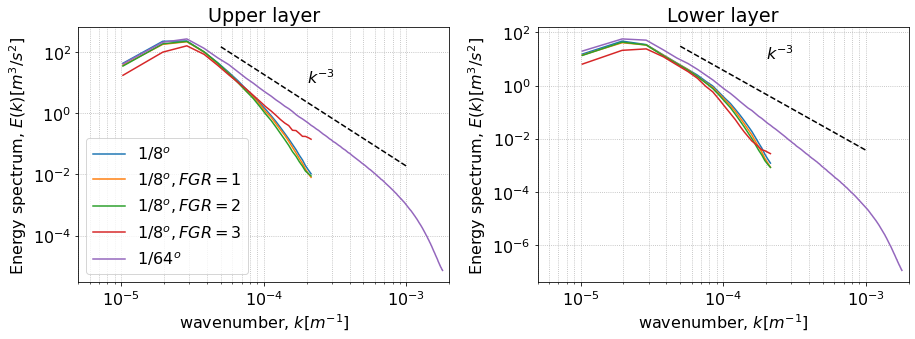

In [40]:
ds.plot_KE_spectrum(('Feb2022/bare/R8', 'Mar2022/R8/FGR/FGR1', 'Mar2022/R8/FGR/FGR2', 'Mar2022/R8/FGR/FGR3', 'Feb2022/bare/R64'),
                    names = ('$1/8^o$', '$1/8^o, FGR=1$', '$1/8^o, FGR=2$', '$1/8^o, FGR=3$', '$1/64^o$'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
plt.savefig('R8_spec.png', dpi=150)

<Figure size 1080x540 with 0 Axes>

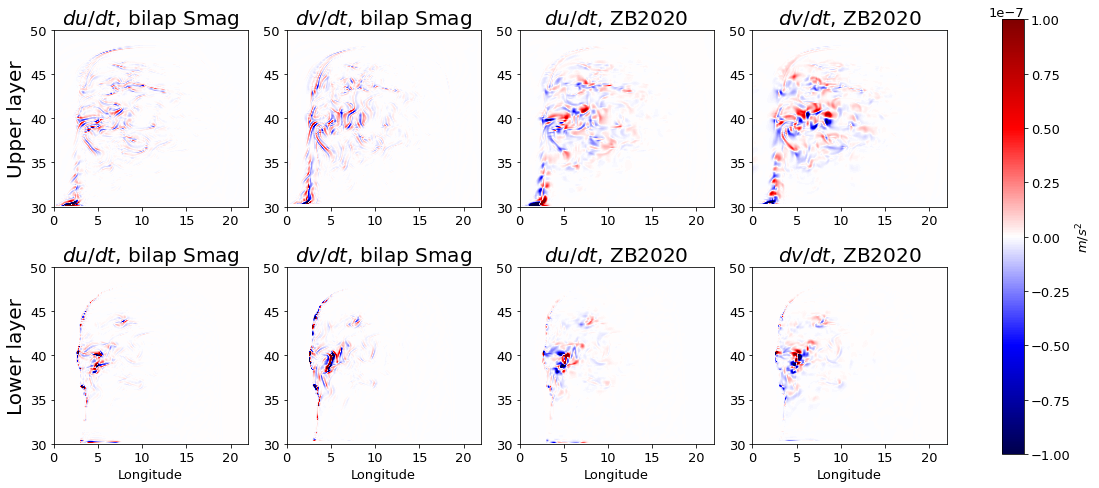

In [16]:
ds.plot_SGS_snapshot('Mar2022/R8/FGR/FGR2', Time = -6)
plt.savefig('ZB_snapshot.png', dpi=150)

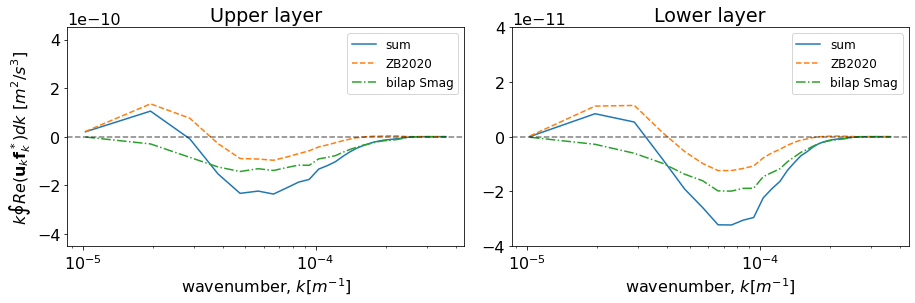

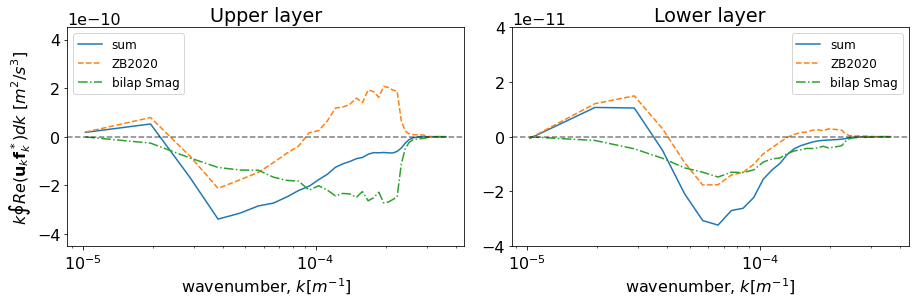

In [140]:
ds.plot_cospectrum_componentwise(['Mar2022/R8/FGR/FGR2'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)
plt.savefig('cospectrum_R8_FGR2.png', dpi=150)
ds.plot_cospectrum_componentwise(['Mar2022/R8/FGR/FGR3'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)
plt.savefig('cospectrum_R8_FGR3.png', dpi=150)

# Visc study

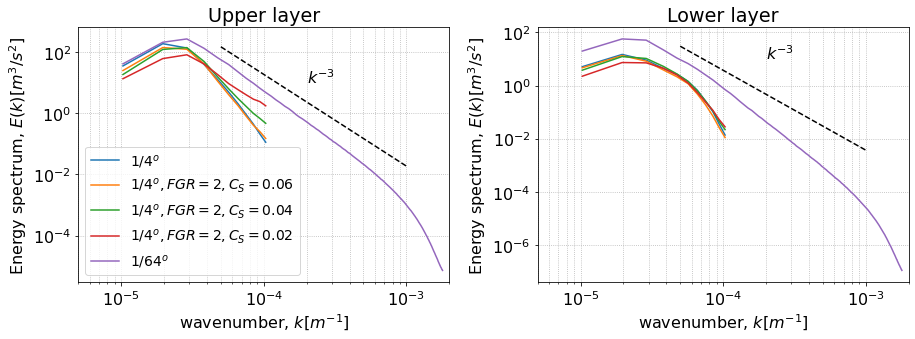

In [18]:
ds.plot_KE_spectrum(('Feb2022/bare/R4', 'Mar2022/R4/Visc/Cs006', 'Mar2022/R4/Visc/Cs004', 'Mar2022/R4/Visc/Cs002', 'Feb2022/bare/R64'),
                    names = ('$1/4^o$', '$1/4^o, FGR=2, C_S=0.06$', '$1/4^o, FGR=2, C_S=0.04$', '$1/4^o, FGR=2, C_S=0.02$', '$1/64^o$'), 
                    tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)
plt.savefig('R4_visc.png', dpi=150)

# Filter study

In [141]:
exps = ('Feb2022/bare/R4', 'Feb2022/bare/R8', 'Feb2022/bare/R32', 'Feb2022/bare/R64',
        'Mar2022/R4/FGR/FGR3',
        'Mar2022/R4/Filter/iter1_order1',  'Mar2022/R4/Filter/iter1_order3', 'Mar2022/R4/Filter/iter2_order1', 'Mar2022/R4/Filter/iter8_order1', 'Mar2022/R4/Filter/iter8_order3',
        'Mar2022/R4/Filter/iter1_order2',  'Mar2022/R4/Filter/iter1_order4', 'Mar2022/R4/Filter/iter4_order1',  'Mar2022/R4/Filter/iter8_order2'
       )

In [142]:
ds = dataset_experiments(common_folder, exps)

<Figure size 1080x540 with 0 Axes>

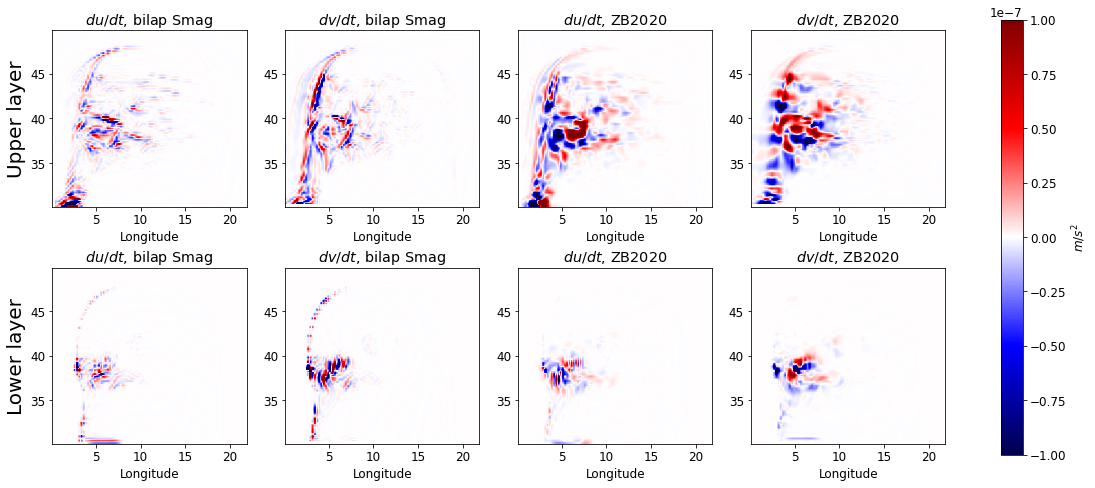

In [112]:
ds.plot_SGS_snapshot('Mar2022/R4/Filter/iter8_order3', Time = -6)
plt.savefig('look_at_me.png', dpi=150)

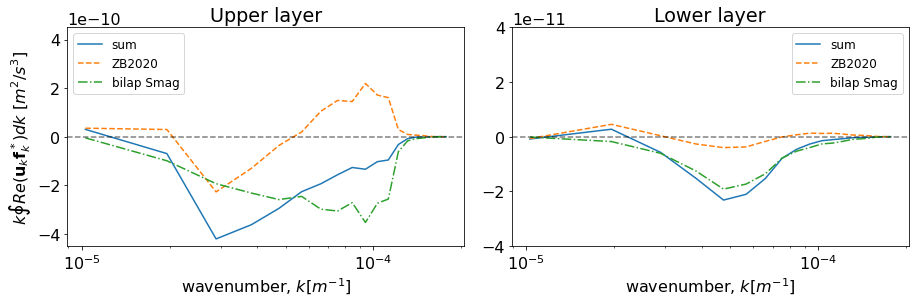

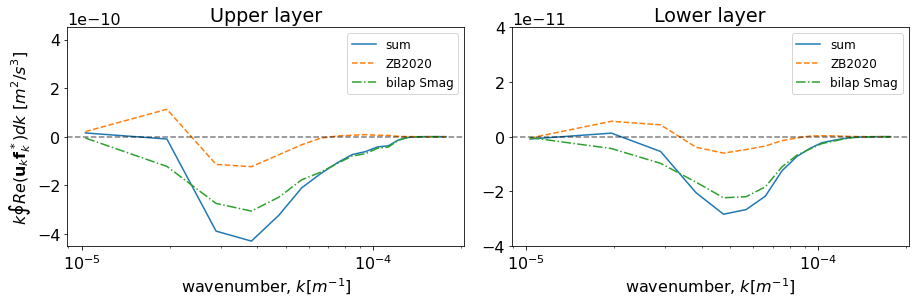

In [143]:
ds.plot_cospectrum_componentwise(['Mar2022/R4/FGR/FGR3'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)
plt.savefig('R4_before_filtering.png', dpi=150)
ds.plot_cospectrum_componentwise(['Mar2022/R4/Filter/iter8_order2'], tstart = 3650., Lat=(35,45), Lon=(5,15), window='hanning', averaging=False, nfactor=1, truncate=False, nd_wavenumber=False)
plt.savefig('R4_after_filtering.png', dpi=150)

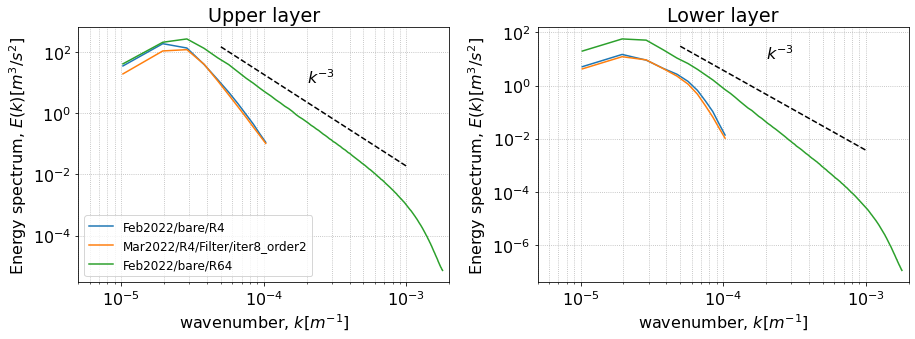

In [131]:
ds.plot_KE_spectrum(('Feb2022/bare/R4', 'Mar2022/R4/Filter/iter8_order2', 'Feb2022/bare/R64'),
                    #names = ('$1/4^o$', '$1/4^o, FGR=2, C_S=0.06$', '$1/4^o, FGR=2, C_S=0.04$', '$1/4^o, FGR=2, C_S=0.02$', '$1/64^o$'), 
                    tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=False)

# SSH R4

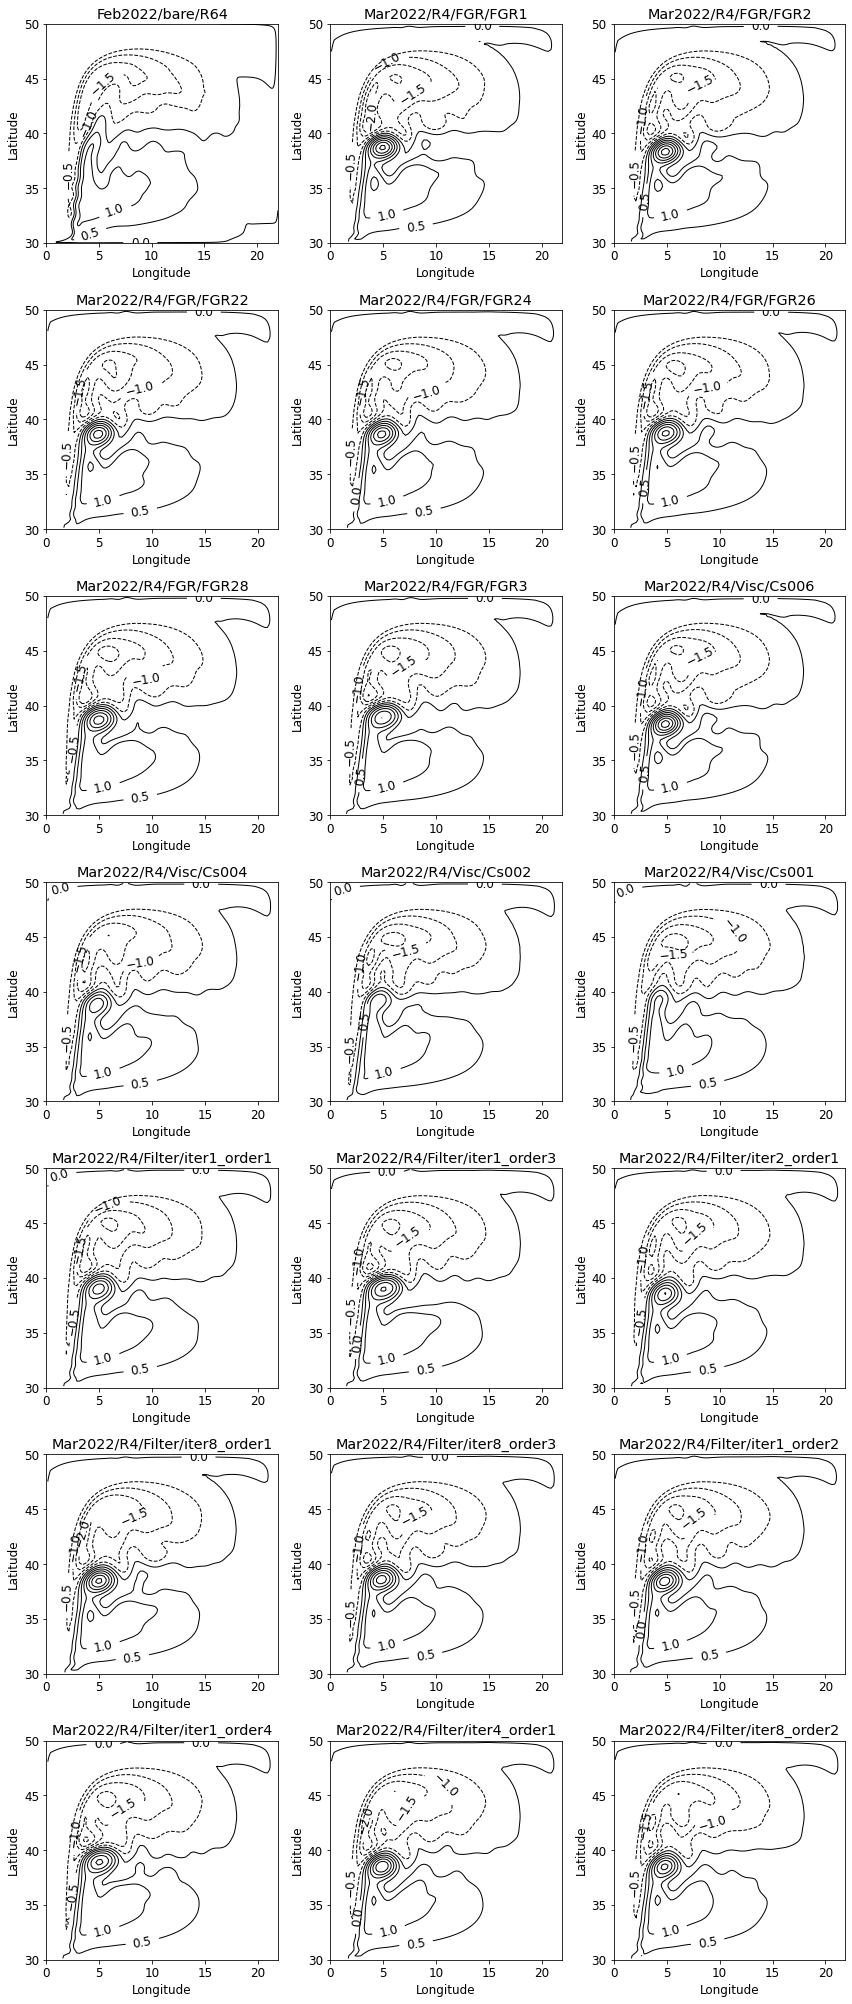

In [29]:
ds.plot_ssh(('Feb2022/bare/R64','Mar2022/R4/FGR/FGR1',  'Mar2022/R4/FGR/FGR2',  'Mar2022/R4/FGR/FGR22',  'Mar2022/R4/FGR/FGR24',  'Mar2022/R4/FGR/FGR26',  'Mar2022/R4/FGR/FGR28',  'Mar2022/R4/FGR/FGR3',
        'Mar2022/R4/Visc/Cs006', 'Mar2022/R4/Visc/Cs004', 'Mar2022/R4/Visc/Cs002', 'Mar2022/R4/Visc/Cs001', 
        'Mar2022/R4/Filter/iter1_order1',  'Mar2022/R4/Filter/iter1_order3', 'Mar2022/R4/Filter/iter2_order1', 'Mar2022/R4/Filter/iter8_order1', 'Mar2022/R4/Filter/iter8_order3',
        'Mar2022/R4/Filter/iter1_order2',  'Mar2022/R4/Filter/iter1_order4', 'Mar2022/R4/Filter/iter4_order1',  'Mar2022/R4/Filter/iter8_order2'))

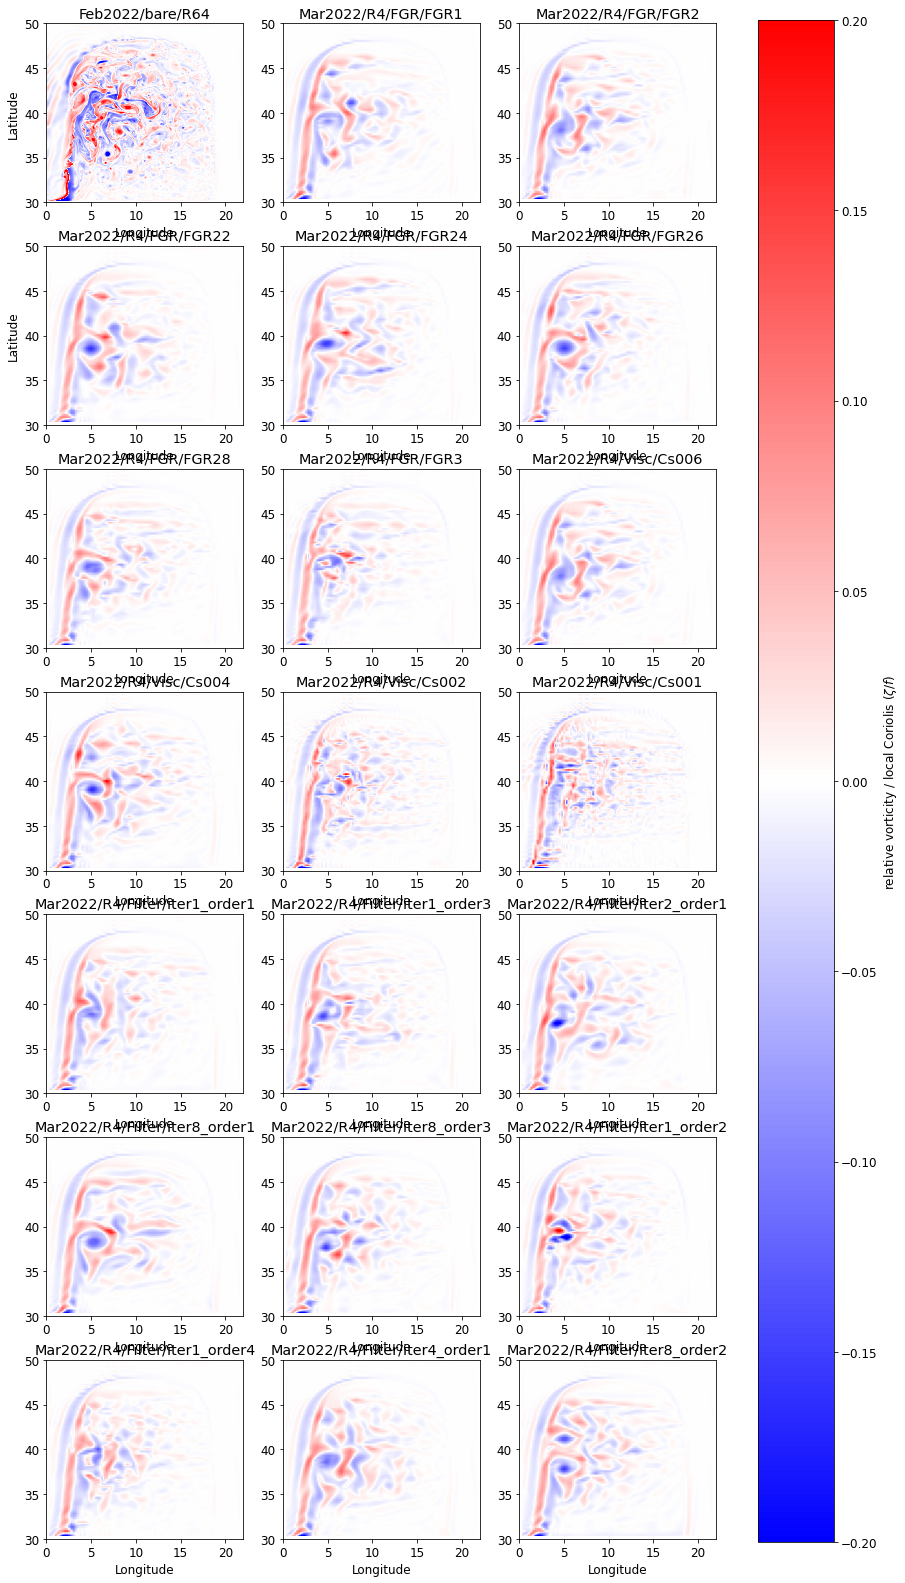

In [31]:
ds.plot_relative_vorticity_snapshot(('Feb2022/bare/R64','Mar2022/R4/FGR/FGR1',  'Mar2022/R4/FGR/FGR2',  'Mar2022/R4/FGR/FGR22',  'Mar2022/R4/FGR/FGR24',  'Mar2022/R4/FGR/FGR26',  'Mar2022/R4/FGR/FGR28',  'Mar2022/R4/FGR/FGR3',
        'Mar2022/R4/Visc/Cs006', 'Mar2022/R4/Visc/Cs004', 'Mar2022/R4/Visc/Cs002', 'Mar2022/R4/Visc/Cs001', 
        'Mar2022/R4/Filter/iter1_order1',  'Mar2022/R4/Filter/iter1_order3', 'Mar2022/R4/Filter/iter2_order1', 'Mar2022/R4/Filter/iter8_order1', 'Mar2022/R4/Filter/iter8_order3',
        'Mar2022/R4/Filter/iter1_order2',  'Mar2022/R4/Filter/iter1_order4', 'Mar2022/R4/Filter/iter4_order1',  'Mar2022/R4/Filter/iter8_order2'))

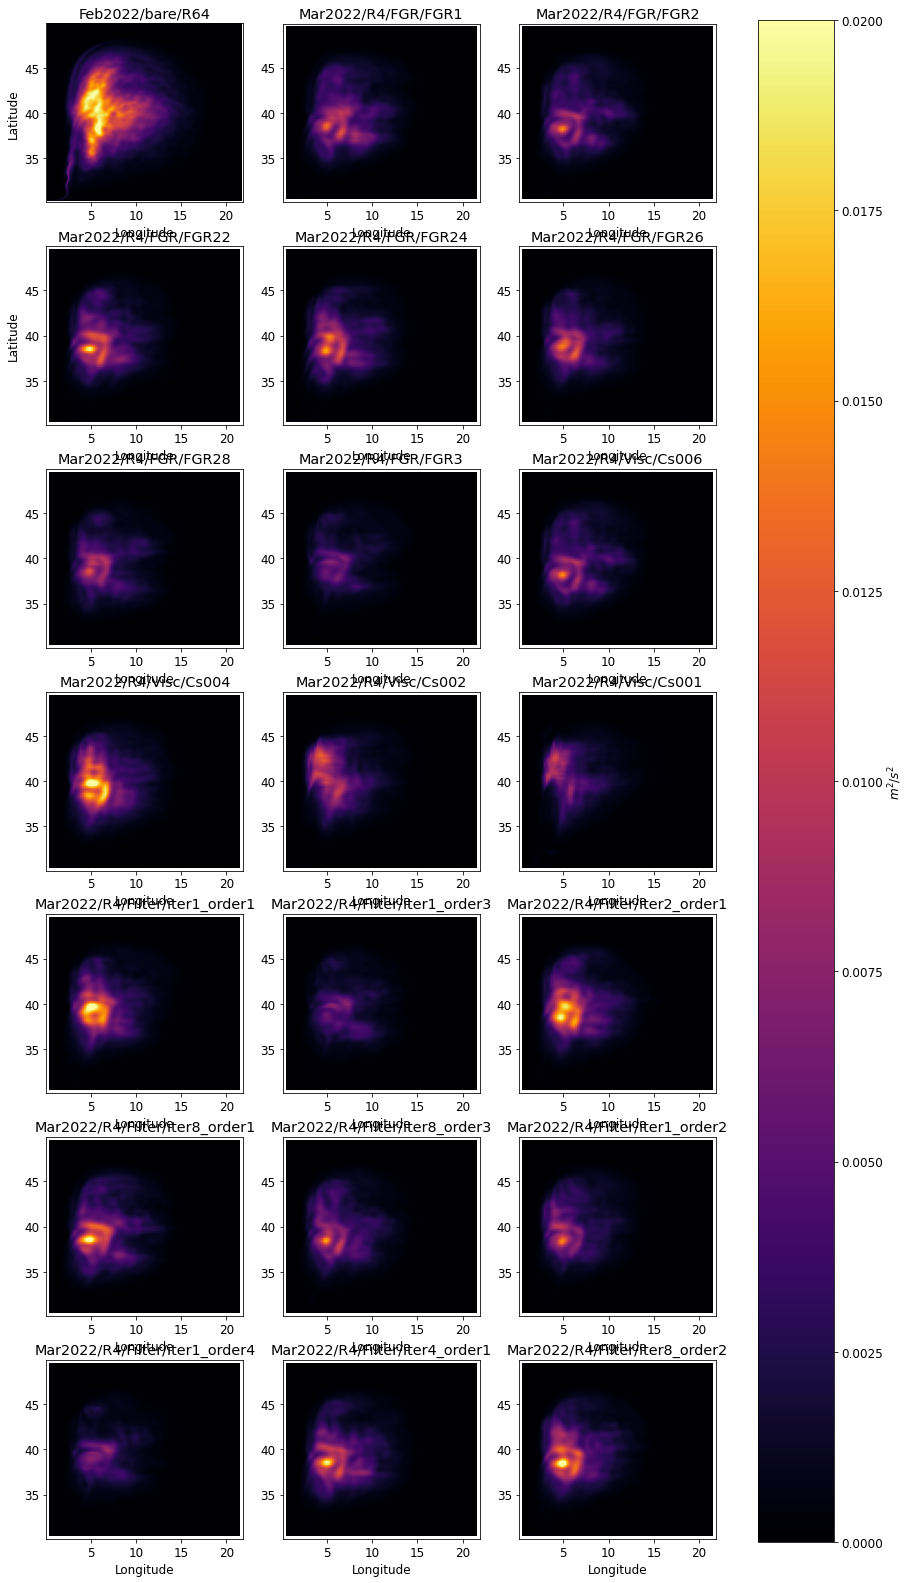

In [32]:
ds.plot_EKE(('Feb2022/bare/R64','Mar2022/R4/FGR/FGR1',  'Mar2022/R4/FGR/FGR2',  'Mar2022/R4/FGR/FGR22',  'Mar2022/R4/FGR/FGR24',  'Mar2022/R4/FGR/FGR26',  'Mar2022/R4/FGR/FGR28',  'Mar2022/R4/FGR/FGR3',
        'Mar2022/R4/Visc/Cs006', 'Mar2022/R4/Visc/Cs004', 'Mar2022/R4/Visc/Cs002', 'Mar2022/R4/Visc/Cs001', 
        'Mar2022/R4/Filter/iter1_order1',  'Mar2022/R4/Filter/iter1_order3', 'Mar2022/R4/Filter/iter2_order1', 'Mar2022/R4/Filter/iter8_order1', 'Mar2022/R4/Filter/iter8_order3',
        'Mar2022/R4/Filter/iter1_order2',  'Mar2022/R4/Filter/iter1_order4', 'Mar2022/R4/Filter/iter4_order1',  'Mar2022/R4/Filter/iter8_order2'))

# SSH R8

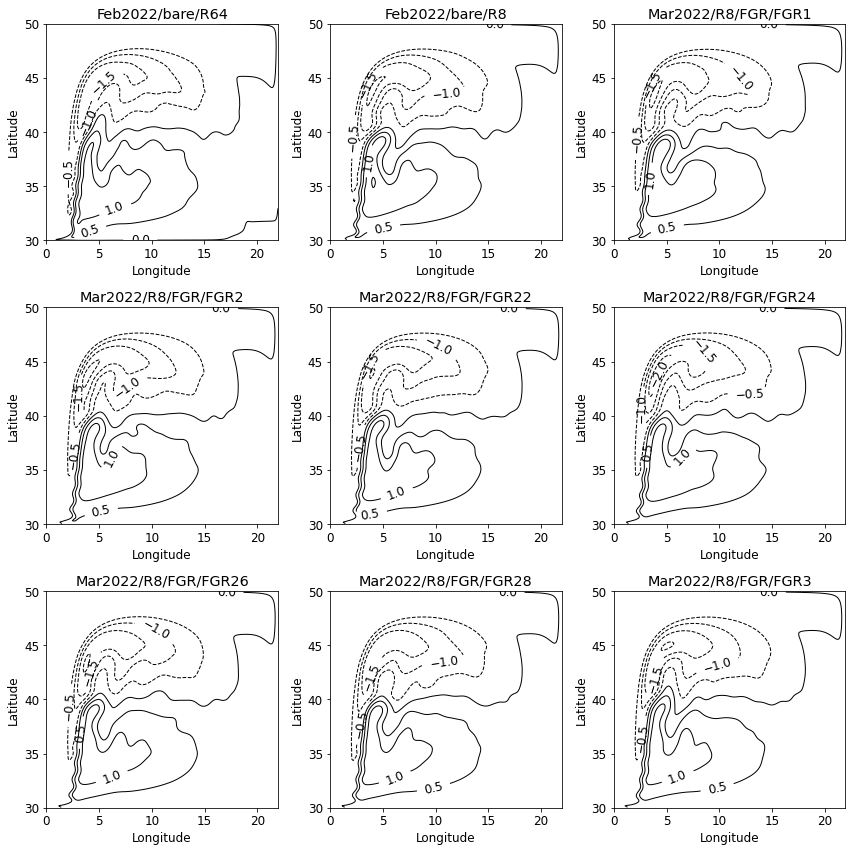

In [34]:
ds.plot_ssh(('Feb2022/bare/R64', 'Feb2022/bare/R8', 'Mar2022/R8/FGR/FGR1',  'Mar2022/R8/FGR/FGR2',  'Mar2022/R8/FGR/FGR22',  'Mar2022/R8/FGR/FGR24',  'Mar2022/R8/FGR/FGR26',  'Mar2022/R8/FGR/FGR28',  'Mar2022/R8/FGR/FGR3',))

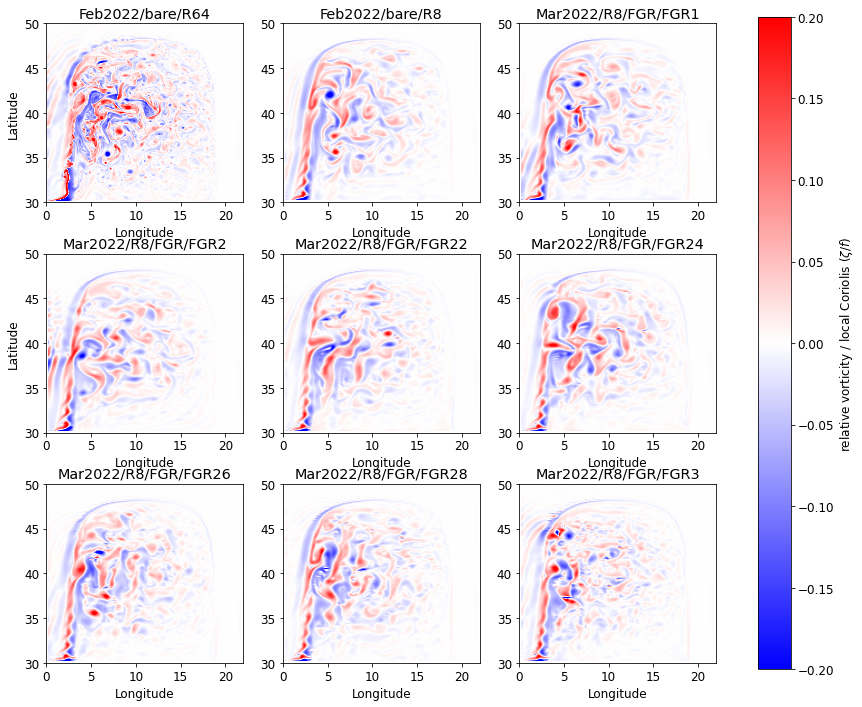

In [35]:
ds.plot_relative_vorticity_snapshot(('Feb2022/bare/R64', 'Feb2022/bare/R8', 'Mar2022/R8/FGR/FGR1',  'Mar2022/R8/FGR/FGR2',  'Mar2022/R8/FGR/FGR22',  'Mar2022/R8/FGR/FGR24',  'Mar2022/R8/FGR/FGR26',  'Mar2022/R8/FGR/FGR28',  'Mar2022/R8/FGR/FGR3',))

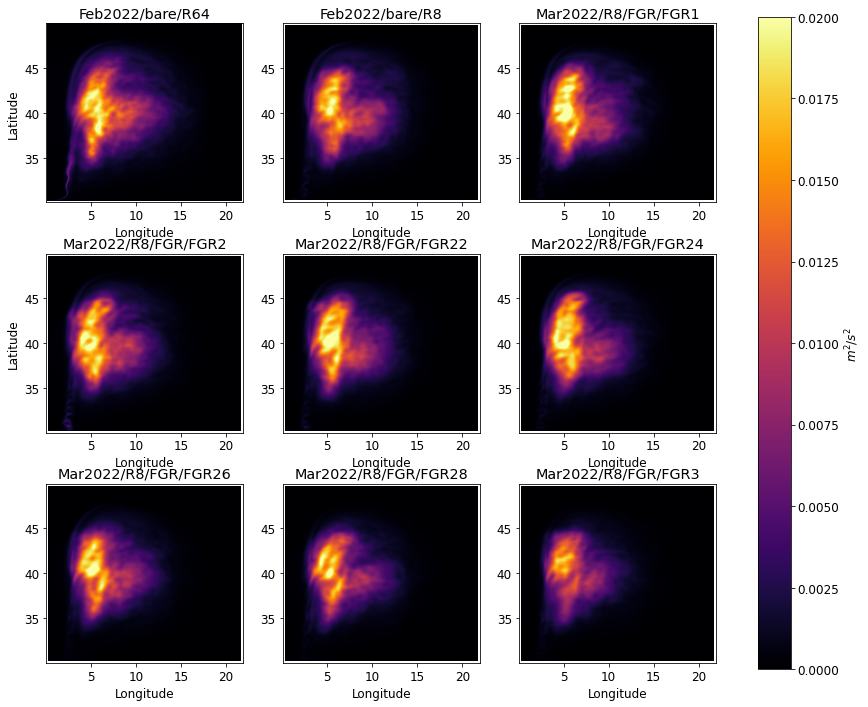

In [36]:
ds.plot_EKE(('Feb2022/bare/R64', 'Feb2022/bare/R8', 'Mar2022/R8/FGR/FGR1',  'Mar2022/R8/FGR/FGR2',  'Mar2022/R8/FGR/FGR22',  'Mar2022/R8/FGR/FGR24',  'Mar2022/R8/FGR/FGR26',  'Mar2022/R8/FGR/FGR28',  'Mar2022/R8/FGR/FGR3',))